In [1]:
import tensorflow as tf

In [2]:
a = tf.Variable(1, name= "a")
b = tf.Variable(2, name = "b")
f = a+b

tf.print("Sum ->", f)

Sum -> 3


In [3]:
import numpy as np 
from tensorflow.keras.datasets import mnist

In [4]:
num_classes = 10 #no of digits (0-9)
num_features = 784 #image shape

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
X_train, X_test = np.array(X_train, np.float32), np.array(X_test, np.float32)

In [7]:
#flattening

X_train, X_test = X_train.reshape([-1, num_features]), X_test.reshape([-1, num_features])

In [8]:
X_train, X_test = X_train / 255., X_test / 255. #normalise to come within rgb

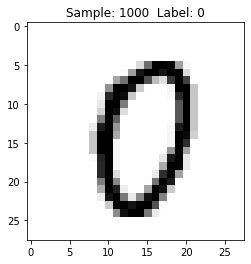

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

def display_sample(num):
    #Print this sample's label 
    label = y_train[num] 
    
    #Reshape the 784 values to a 28x28 image
    image = X_train[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1000)